### 목표

- 버섯의 특징을 활용해서 독성/식용 버섯을 분류 해나가보자!
- 결정트리 모델 사용
- 과대적합 제어
- 특성의 중요도 확인

    ## 결정 트리
        - 중요한 특성일수록 탑노드에 위치시킴
        - 모델 내부적으로 들어있는 기능

In [2]:
# 라이브러리 불러오기
import pandas as pd
import matplotlib.pyplot as plt
# 머신러닝 도구
from sklearn.model_selection import train_test_split # train, test 분리 도구
from sklearn.tree import DecisionTreeClassifier # 결정 트리 사용 -> 분류 모델

# 전체 데이터 보는 기능
# 열 pd.set_option('display.max_columns',None)
# 행 pd.set_option('display.max_rows',None)

# 데이터 불러오기
data  = pd.read_csv('./data/mushroom.csv')
print(data.head())
print(data.shape)

  poisonous cap-shape cap-surface cap-color bruises odor gill-attachment  \
0         p         x           s         n       t    p               f   
1         e         x           s         y       t    a               f   
2         e         b           s         w       t    l               f   
3         p         x           y         w       t    p               f   
4         e         x           s         g       f    n               f   

  gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
0            c         n          k  ...                        s   
1            c         b          k  ...                        s   
2            c         b          n  ...                        s   
3            c         n          n  ...                        s   
4            w         b          k  ...                        s   

  stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
0                      w                      w         

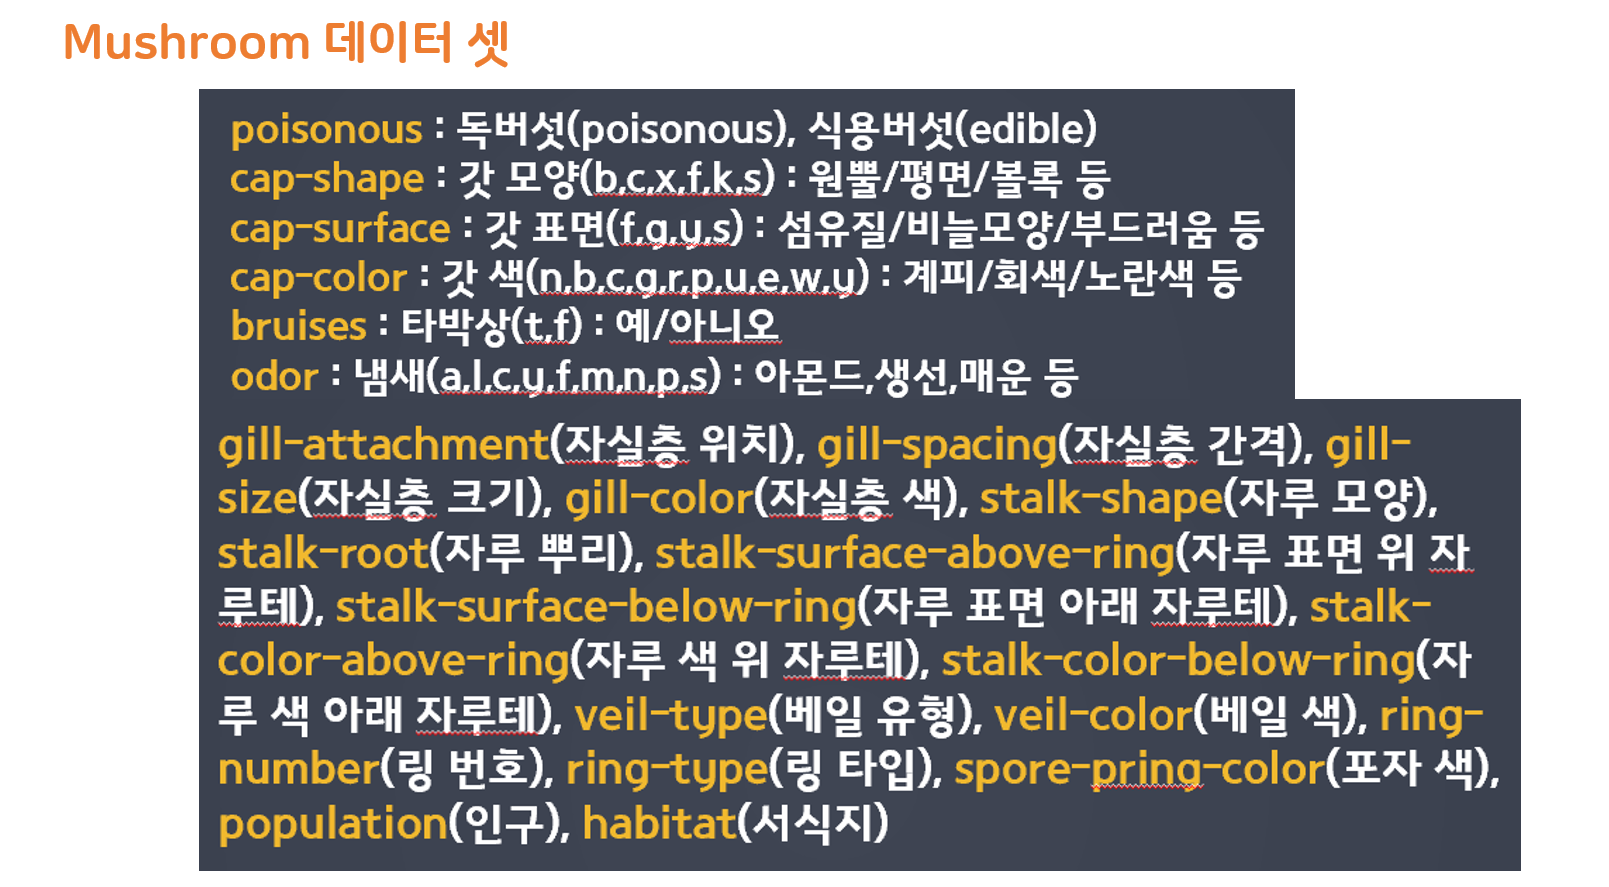

In [3]:
# 데이터의 정보 확인

data.info()

# 결측치 없으므로 전처리 x
# 데이터 타입 -> 문자열 -> 숫자로 전처리 필요
# 머신러닝 알고리즘은 문자열이 값을 입력값으로 허용되지 않는다.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   poisonous                 8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

- 데이터 분리
    - X(문제데이터) , y(정답데이터)분리
    - 문제 (X, 특성, 특징, 피처 ,독립변수) : poisonous 를 제외한 모든 컬럼
    - 답(y, 레이블, 라벨, target, 종속변수) : poisonus

In [4]:
# 문제 정답 데이터 분리
y = data['poisonous']
#X = data.iloc[:,1:]
X = data.drop('poisonous',axis=1)

In [5]:
print(X.shape)
print(y.shape)

(8124, 22)
(8124,)


In [6]:
# 기술 통계량 확인

X.describe()

# 데이터 타입이 문자열 형태이기 때문에 문자열에 대한 기술 통계량을 제공
# count : 행의 갯수를 측정 - 단순 카운트
# unique : 등장한 데이터의 갯수(중복되지 유일한 값)
# top : 가장 많이 등장한 데이터 
# freq(frequency) : 빈도수 - 가장 많이 등장한 데이터의 횟수


,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,6,4,10,2,9,2,2,2,12,2,...,4,9,9,1,4,3,5,9,6,7
top,x,y,n,f,n,f,c,b,b,t,...,s,w,w,p,w,o,p,w,v,d
freq,3656,3244,2284,4748,3528,7914,6812,5612,1728,4608,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [7]:
# Label 값의 횟수 확인하기

y.value_counts()
# 클래스 2개
# e 식용 , p 독성

e    4208
p    3916
Name: poisonous, dtype: int64

# 데이터 전처리

- 문자 데이터를 숫자 데이터로 변환 (Encoding)
- 인코딩 방법 2가지
    1. 원한 인코딩
    2. 레이블 인코딩

### 데이터 표현
    - 연속형(수치형) 특성 : 숫자로 이루어진 순서가 있는 데이터
    - 범주형(문자형) 특성 : 문자로 이루진 데이터
    - Encoding : 범주형 데이터를 숫자형 데이터로 변환
    (Label Encoding, One-hot Encoding)
    - Decoding : 숫자형 데이터를 범주형 데이터로 변환


## One-hot Encoding

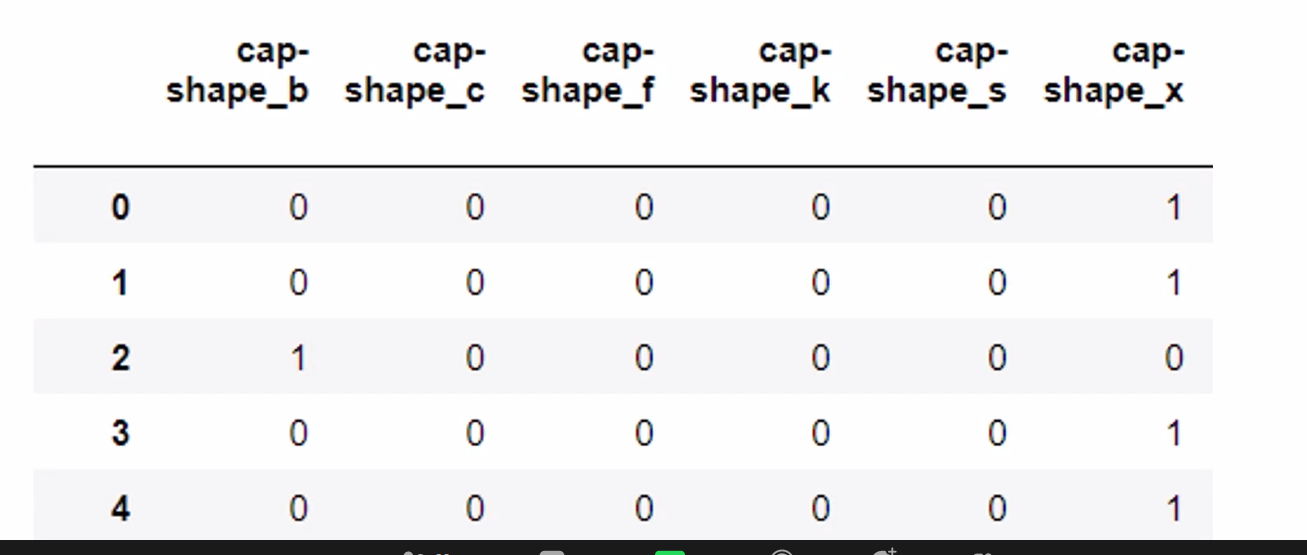

 - 분류하고자 하는 범주(종류)만큼의 자릿수를 만들고 단 한 개의 1과 나머지 0으로 채워서 숫자화 하는 방식

 ## Label Encoding 

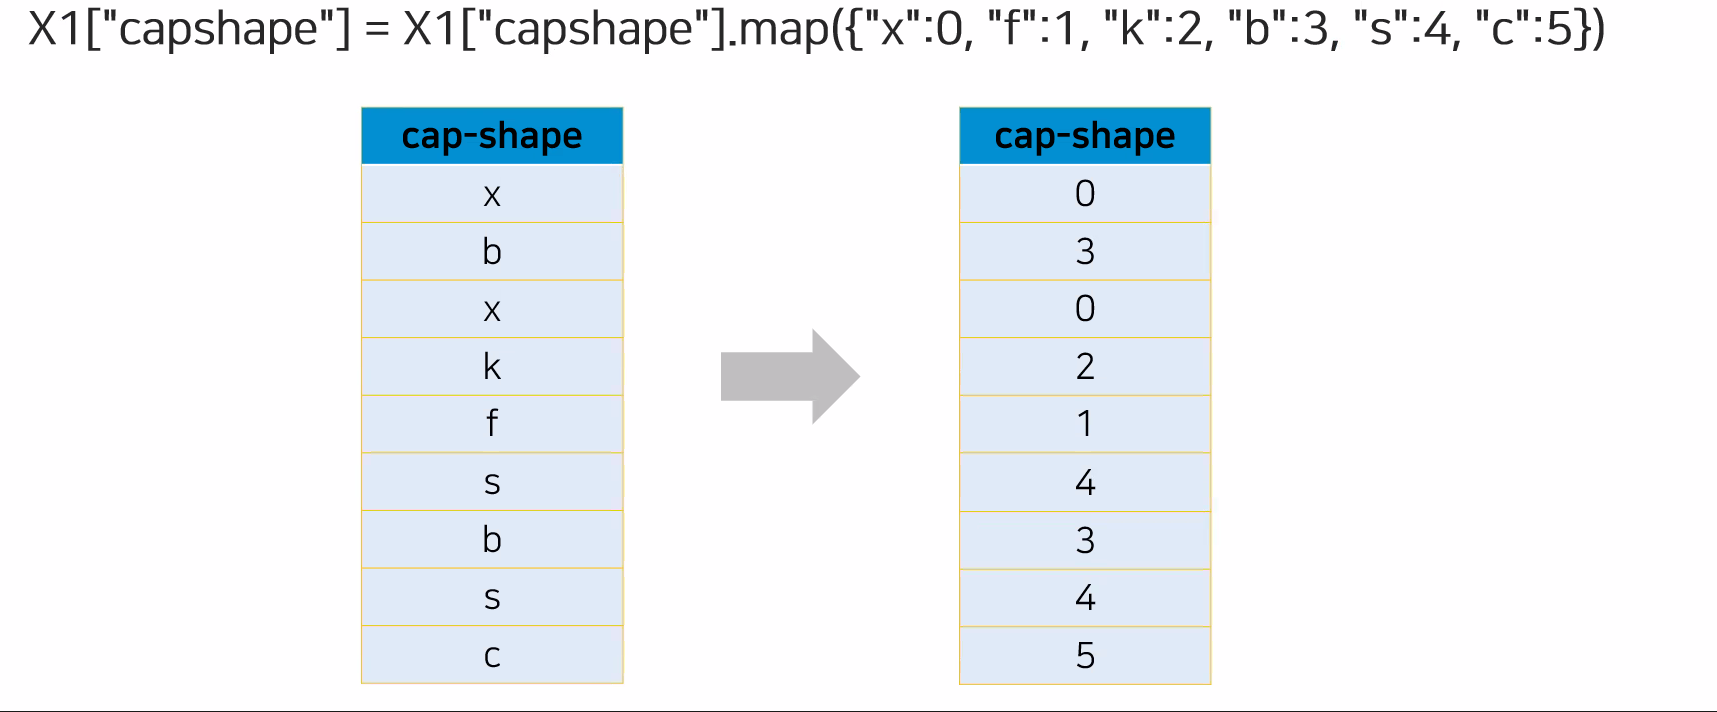

 - 레일블을 숫자로 Mapping -> 우선순위를 부여


 

In [8]:
# one hot Encoding : 값의 크고 작음의 의미가 없는 경우 사용 -> 우선 순위 x
# 기술통계량에서 unique 한 개수만큼 컬럼을 생성
# 일치하는 값에는 1을, 아닌 컬럼에는 0을 주는 방식으로 Encoding 진행
# one hot Encoding 도구 : pandas 에서 제공 -> pd.get_dummies(데이터)

X_one_hot = pd.get_dummies(X)

In [9]:
# 레이블 Encoding : 값의 크고 작음의 의미가 있는 경우 사용( 우선 순위 존재)
# 예시 ) 학점, 직급

In [10]:
# train , test 데이터로 분리

X_train , X_test, y_train , y_test = train_test_split(X_one_hot,y, test_size=0.3 , random_state=7)
print(f"훈련용 문제 : {X_train.shape}")
print(f"훈련용 답 : {y_train.shape}")
print(f"테스트용 문제 : {X_test.shape}")
print(f"테스트용 답 : {y_test.shape}")

훈련용 문제 : (5686, 117)
훈련용 답 : (5686,)
테스트용 문제 : (2438, 117)
테스트용 답 : (2438,)


### 모델링
 - 모델 객체 생성, 학습 , 평가

In [11]:
tree_model = DecisionTreeClassifier()

tree_model.fit(X_train,y_train)

DecisionTreeClassifier()

In [12]:
from  sklearn.metrics import accuracy_score
predict = tree_model.predict(X_test)
tree_model.score(X_test,y_test)

1.0

### 하이퍼 파라미터 조정을 활용해서 과대적합 제어

# 


In [13]:
# 과대적합 제어방법
# 하이퍼파라미터 튜닝
# min_smaples_split : 의견노드가 가져야할 최소 샘플
# min_samples_leaf : 잎이 가져야할 최소의 샘플수
# max_depth : 최대 깊이
# max_leaf_nodes : 잎이 최대 개수
# 
tree_model_control = DecisionTreeClassifier(min_samples_split=5 , max_depth= 3 , max_leaf_nodes= 30 , min_samples_leaf= 10 )

tree_model_control.fit(X_train,y_train)
tree_model_control.score(X_test,y_test)

0.9868744872846595

### 특성 선택(feature selection)

- 지도 학습 모델에서는 데이터 간 특성들의 중요도를 출력해 볼 수 있다.
- 정답에 얼마나 영향을 미치는지 수치로 확인이 가능
- 0 ~ 1 사이의 중요도를 가진다. (1과 가까울수록 중요한 특성으로 인식)
- 모든 중요도의 합이 1
- tree 모델은 내부적으로 특성의 중요도가 높은 조건을 선택하여 탑노드에 배치



In [16]:
# 줄어 들어있는 데이터 확인 방법
pd.set_option('display.max_seq_items',None)

# 전체 특성 확인
X_one_hot.columns

Index(['cap-shape_b', 'cap-shape_c', 'cap-shape_f', 'cap-shape_k',
       'cap-shape_s', 'cap-shape_x', 'cap-surface_f', 'cap-surface_g',
       'cap-surface_s', 'cap-surface_y', 'cap-color_b', 'cap-color_c',
       'cap-color_e', 'cap-color_g', 'cap-color_n', 'cap-color_p',
       'cap-color_r', 'cap-color_u', 'cap-color_w', 'cap-color_y', 'bruises_f',
       'bruises_t', 'odor_a', 'odor_c', 'odor_f', 'odor_l', 'odor_m', 'odor_n',
       'odor_p', 'odor_s', 'odor_y', 'gill-attachment_a', 'gill-attachment_f',
       'gill-spacing_c', 'gill-spacing_w', 'gill-size_b', 'gill-size_n',
       'gill-color_b', 'gill-color_e', 'gill-color_g', 'gill-color_h',
       'gill-color_k', 'gill-color_n', 'gill-color_o', 'gill-color_p',
       'gill-color_r', 'gill-color_u', 'gill-color_w', 'gill-color_y',
       'stalk-shape_e', 'stalk-shape_t', 'stalk-root_?', 'stalk-root_b',
       'stalk-root_c', 'stalk-root_e', 'stalk-root_r',
       'stalk-surface-above-ring_f', 'stalk-surface-above-ring_k',
    

In [18]:
# tree_model.feature_importances_
fi = tree_model.feature_importances_

In [26]:
# 전체 행 데이터 보는 방법 set_option('display.max_rows(columns)', None-> 보고 싶은 개수 (None인 경운 전체 데이터))
pd.set_option('display.max_rows',5)


fi_df = pd.DataFrame(fi,index = X_one_hot.columns,columns=['특성 중요도'])
fi_df.sort_values(by='특성 중요도',ascending=False)

# 가장 영향력 있는 컬럼을 의사결정시 탑노드에 배치시칸다.
# 특성이 117개 모두 사용하는 것은 의미가 없다.!
# 실제적으로 정답에 영향을 미치는 데이터는 몇개 안됨

,특성 중요도
odor_n,0.608902
stalk-root_c,0.181454
...,...
gill-spacing_w,0.000000
habitat_w,0.000000


### 교차검증
- 개념 : 모델의 일반화 성능 측정 방법
    - 모델이 데이터에 대해서 얼마나 높은 정확도를 가지는지 평가할 때 한 번만 하는게 아닌 여러번 나누어서 평가하는 것이 신뢰도가 높다.
- 방법 : 한정된 데이터 안에서 훈련 세트와 테스트 세트를 한 번더 나누어 여러번 나누어 평가
- 우리가 만든 모델의 일반화 성능은 어느 정도일까? 에 대한 답을 주는 방법

- 단점 : 연산 시간과 비용이 늘어날 수 있다.

In [32]:
# 교차검증(cross_validation)
# 일반화가 되었다는 의미? ?  -> any new 데이터가 들어와도 비슷한 정확도를 내는 것
# 라이브러리 불러오기

from sklearn.model_selection import cross_val_score

# cross_val_score(적용할 모델 이름, 훈련 데이터 , 답 데이터 , cv = 교차검증 횟수(int))
result = cross_val_score(tree_model,X_train,y_train,cv=5)
result

# tree_model : 어떤 데이터가 들어와도 비슷한 성능을 내고 있음을 확인
# 모두 1에 가까운 정확도를 내고 있다 -> 일반화 성능이 괜찮은?
# 왜 ? 과대적합이 아닌? --> 특성 분리가 잘 되어있기 때문
result.mean()

0.9998240985048372

In [30]:
# cross_val_score(적용할 모델 이름, 훈련 데이터 , 답 데이터 , cv = 교차검증 횟수(int))
cross_val_score(tree_model_control,X_train,y_train,cv=5)

array([0.98242531, 0.98680739, 0.98504837, 0.97977133, 0.98592788])